In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,20)

In [32]:
 data= pd.read_csv("housing_data.csv")
    

In [33]:
data.shape

(13320, 9)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [35]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data cleaning

In [203]:
data1=data.drop(["availability","society","area_type","balcony"] ,axis=1)

In [204]:
data1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [205]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [206]:
data1.dropna(inplace=True)

In [207]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [208]:
data1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [209]:
data1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [210]:
data1["bhk"]=data1["size"].apply(lambda x:int(x.split(" ")[0]))

In [211]:
data1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [212]:
data1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [213]:
def is_float(x):
    try:
        float(x)
    except:
       return False
    return True
    

In [214]:
data1[data1["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [215]:
def convert_sqft_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    


In [216]:
data1.shape

(13246, 6)

In [217]:
data2=data1.copy()
data2["total_sqft"]=data2["total_sqft"].apply(convert_sqft_num)
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [218]:
data3=data2.copy()
data3["price_per_sqft"]=data3["price"]*100000/data3["total_sqft"]
data3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [219]:
data3.shape

(13246, 7)

# Outlier removal

In [221]:
data4=data3[(data3.total_sqft/data3.bhk>300)]

In [222]:
data4.shape

(12274, 7)

In [223]:
data4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


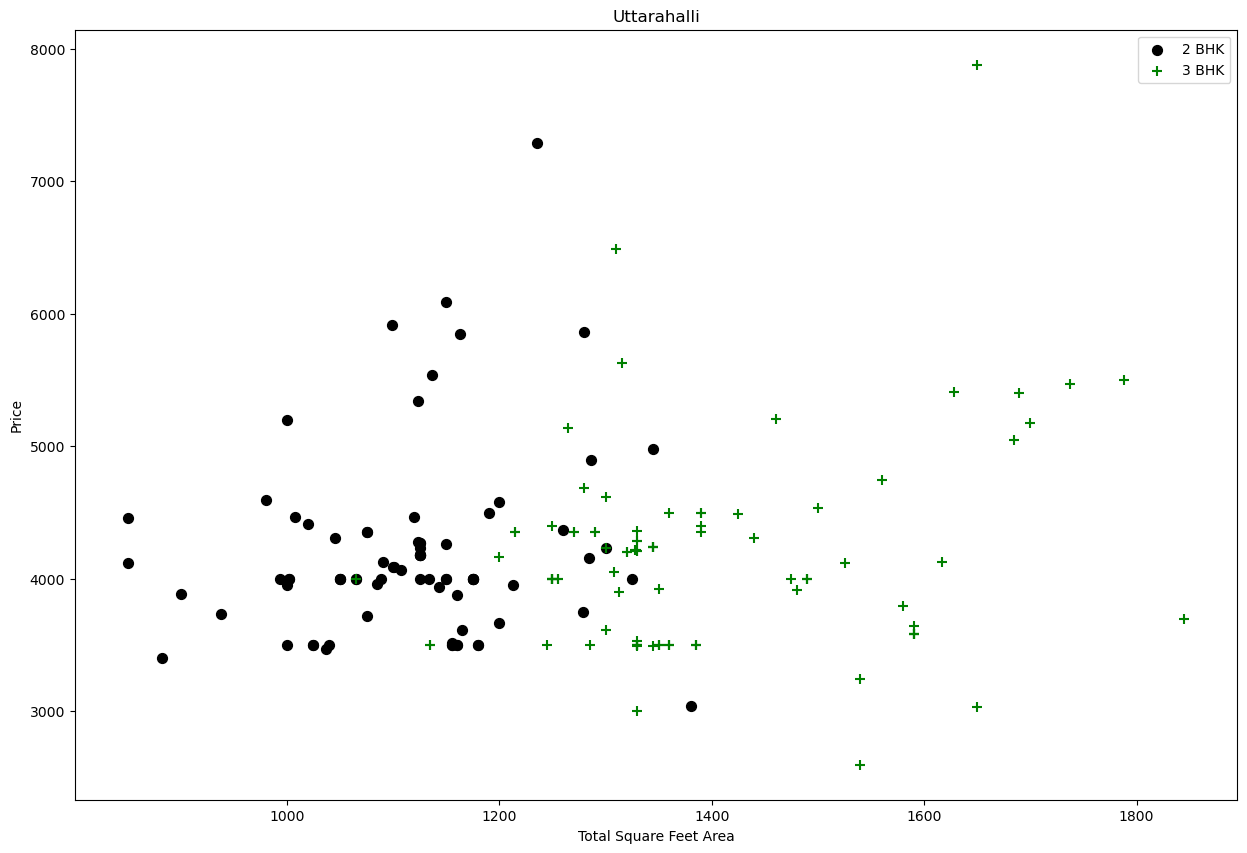

In [224]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='black',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data4,"Uttarahalli")


Text(0, 0.5, 'Count')

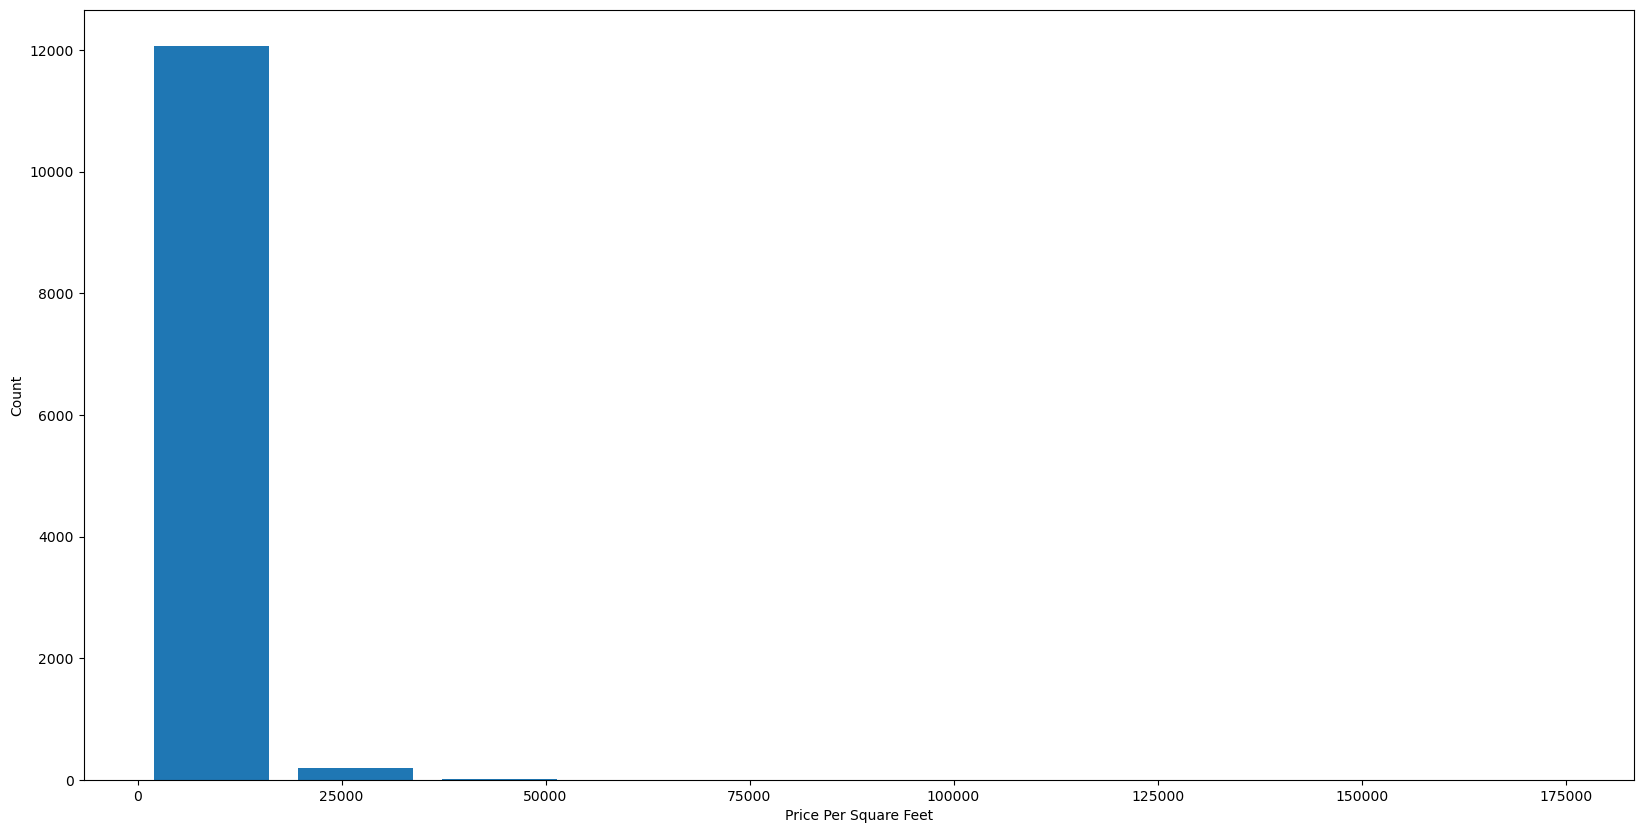

In [225]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# One Hot Encoding

In [227]:
pd.get_dummies((data4.location),dtype=int)

,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,Thanisandra,...,pavitra paradise,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,"white field,kadugodi",whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
data4 = data4.join(pd.get_dummies(data4.location,dtype=int)).drop(["location"],axis="columns")
data4.head(2)

,size,total_sqft,bath,price,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,...,pavitra paradise,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,"white field,kadugodi",whitefiled
0,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
data5=data4.drop('size',axis='columns')

In [238]:
data5

,total_sqft,bath,price,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,...,pavitra paradise,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,"white field,kadugodi",whitefiled
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,5,6689.834926,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,3600.0,5.0,400.00,4,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a Model using Linear Regression

In [239]:
X = data5.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,pavitra paradise,poornaprajna layout,"ravindra nagar, T.dasarahalli peenya",rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,tc.palya,"white field,kadugodi",whitefiled
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,4615.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
X.shape

(12274, 1187)

In [264]:
y = data4.price
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [266]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.6211313301758778

# Testing the Model

In [267]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'price_per_sqft', ' Anekal', ' Banaswadi',
       ' Basavangudi', ' Devarabeesana Halli', ' Devarachikkanahalli',
       ' Electronic City',
       ...
       'pavitra paradise', 'poornaprajna layout',
       'ravindra nagar, T.dasarahalli peenya', 'rr nagar', 'sankeswari',
       'sapthagiri Layout', 'sarjapura main road', 'tc.palya',
       'white field,kadugodi', 'whitefiled'],
      dtype='object', length=1187)

In [285]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [300]:
predict_price(' Devarabeesana Halli',5000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.2005873905027